In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold
import numpy as np

In [2]:
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

#### Load dataset

In [3]:
import os
import pandas as pd
from collections import Counter

PATH = '..\\Dataset EMNLP\\novels\\'

data = []

for root, dirs, files in os.walk(PATH):
    for i,name in enumerate(files):
        if name.endswith((".txt")):
            dir_split = root.replace('.','')
            dir_split = dir_split.split('\\')
            #print(dir_split)
            category = dir_split[3]
            outcome = dir_split[5]
            file = open(root+'\\'+name, 'r')
            text_data = file.read()
            temp = []
            temp.append(category)
            temp.append(text_data)
            temp.append(outcome)
            data.append(temp)
            
            #print(category,outcome,name)

In [4]:
df = pd.DataFrame(data)
df.columns = ['category','data','outcome']
print(len(df))
#df['value']=df.outcome.str[7:8]
df['outcome']=df.outcome.str[0:7]
print(df.head())
print(df.tail())

800
            category                                               data  \
0  Adventure_Stories  the story told in this book is based upon lege...   
1  Adventure_Stories  chapter i\nan introductory disaster\nearly in ...   
2  Adventure_Stories  editor's note\n"martin rattler" was one of, ro...   
3  Adventure_Stories  chapter i\na may party\n"marjorie maynard's ma...   
4  Adventure_Stories  chapter i.\ntwo young friends.\nat the mouth o...   

   outcome  
0  failure  
1  failure  
2  failure  
3  failure  
4  failure  
          category                                               data  outcome
795  Short_Stories  i am the last of my type existing today in all...  success
796  Short_Stories  "the time has come," the walrus said,\n"to tal...  success
797  Short_Stories  experiment\n"the first time machine, gentlemen...  success
798  Short_Stories  o. henry, afrite-chef of all delight--\nof all...  success
799  Short_Stories  preface\npoltarnees, beholder of ocean\nblagda...  s

In [5]:
df['filtered'] = df.data.str.split('.').str[:1000]

In [6]:
#df['filtered'] = df.data

In [7]:
df.filtered.head()

0    [the story told in this book is based upon leg...
1    [chapter i\nan introductory disaster\nearly in...
2    [editor's note\n"martin rattler" was one of, r...
3    [chapter i\na may party\n"marjorie maynard's m...
4    [chapter i, \ntwo young friends, \nat the mout...
Name: filtered, dtype: object

In [8]:
df.filtered = df.filtered.astype(str)

#### Unigram model

In [9]:
uni_gram_acc_emnlp = {}
for category in df.category.unique():
    print(category)
    df_temp = df[df.category==category]
    tfidf_vect = CountVectorizer(analyzer='word')
    tfidf_vect.fit(df_temp['filtered'])
    tfidf_data =  tfidf_vect.transform(df_temp['filtered'])
    
    # label encode the target variable 
    encoder = preprocessing.LabelEncoder()
    y_data = encoder.fit_transform(df_temp.outcome)
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    mean_acr = []
    for train_index, test_index in kf.split(y_data):
        
        X_train, X_test = tfidf_data[train_index], tfidf_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        
        # LinearSVC on Ngram Level TF IDF Vectors
        clf = svm.LinearSVC()
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = np.mean(preds == y_test)
        mean_acr.append(score)
        
    print("mean F1: ",  np.array(mean_acr).mean())
    uni_gram_acc_emnlp[category] = np.array(mean_acr).mean()

Adventure_Stories
mean F1:  0.76
Fiction
mean F1:  0.6900000000000001
Historical_Fiction
mean F1:  0.61
Love_Stories
mean F1:  0.5900000000000001
Mystery
mean F1:  0.7
Poetry
mean F1:  0.64
Science_Fiction
mean F1:  0.6799999999999999
Short_Stories
mean F1:  0.6399999999999999


#### Bigram model

In [10]:
bi_gram_acc_emnlp = {}
for category in df.category.unique():
    print(category)
    df_temp = df[df.category==category]
    tfidf_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))
    tfidf_vect.fit(df_temp['filtered'])
    tfidf_data =  tfidf_vect.transform(df_temp['filtered'])
    
    # label encode the target variable 
    encoder = preprocessing.LabelEncoder()
    y_data = encoder.fit_transform(df_temp.outcome)
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    mean_acr = []
    for train_index, test_index in kf.split(y_data):
        
        X_train, X_test = tfidf_data[train_index], tfidf_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        
        # LinearSVC on Ngram Level TF IDF Vectors
        clf = svm.LinearSVC()
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = np.mean(preds == y_test)
        mean_acr.append(score)
        
    print("mean F1: ",  np.array(mean_acr).mean())
    bi_gram_acc_emnlp[category] = np.array(mean_acr).mean()

Adventure_Stories
mean F1:  0.75
Fiction
mean F1:  0.74
Historical_Fiction
mean F1:  0.58
Love_Stories
mean F1:  0.6900000000000001
Mystery
mean F1:  0.71
Poetry
mean F1:  0.6799999999999999
Science_Fiction
mean F1:  0.57
Short_Stories
mean F1:  0.74


In [11]:
df_emnlp_uni = pd.DataFrame(list(uni_gram_acc_emnlp.items()), columns=['Category', 'Accuracy'])
df_emnlp_bi =  pd.DataFrame(list(bi_gram_acc_emnlp.items()), columns=['Category', 'Accuracy'])

In [12]:
UNI = {'Adventure_Stories': 84.0, 
       'Fiction': 75.0, 
       'Historical_Fiction': 60.0, 
       'Love_Stories': 82.0,
       'Mystery': 73.0, 
       'Poetry': 71.0, 
       'Science_Fiction': 61.0, 
       'Short_Stories': 57.0}

for i in UNI.keys():
    UNI[i] = UNI[i]/100

In [13]:
BI = {'Adventure_Stories': 81.0, 
       'Fiction': 75.0, 
       'Historical_Fiction': 51.0, 
       'Love_Stories': 72.0,
       'Mystery': 73.0, 
       'Poetry': 72.0, 
       'Science_Fiction': 59.0, 
       'Short_Stories': 57.0}

for i in BI.keys():
    BI[i] = BI[i]/100

In [14]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(uni_gram_acc_emnlp.values(), label = 'my unigram',linewidth=4)
plt.plot(UNI.values(), label = 'paper unigram')
ax.legend(loc='best')
plt.xticks(range(8), df.category.unique())
plt.show()

<Figure size 2000x1000 with 1 Axes>

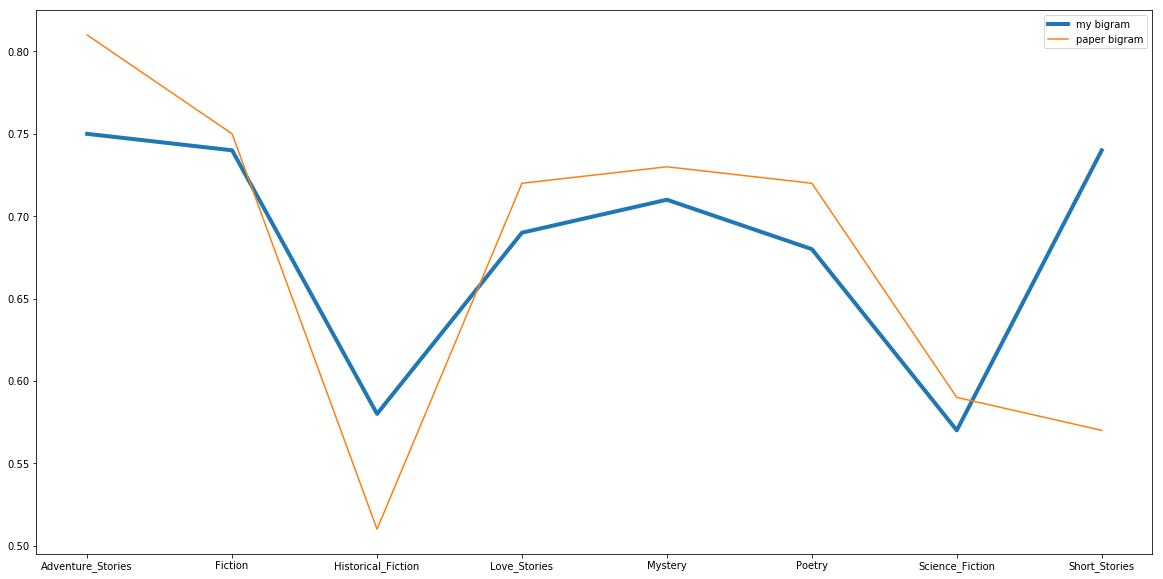

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(bi_gram_acc_emnlp.values(), label = 'my bigram',linewidth=4)
plt.plot(BI.values(), label = 'paper bigram')
ax.legend(loc='best')
plt.xticks(range(8), df.category.unique())
plt.show()

In [43]:
import os
import pandas as pd
from collections import Counter

PATH = '..\\Emotion Flow GitHub\\data\\'

data = []

for root, dirs, files in os.walk(PATH):
    for i,name in enumerate(files):
        if name.endswith((".txt")):
            dir_split = root.replace('.','')
            dir_split = dir_split.split('\\')
            category = dir_split[3]
            outcome = dir_split[4]
            file = open(root+'\\'+name, 'r', encoding='utf-8',errors='ignore')
            text_data = file.read()
            temp = []
            temp.append(category)
            temp.append(text_data)
            temp.append(outcome)
            data.append(temp)
            
            #print(category,outcome,name)
file.close()

In [44]:
df = pd.DataFrame(data)
df.columns = ['category','data','outcome']
print(len(df))
#df['value']=df.outcome.str[7:8]
df['outcome']=df.outcome.str[0:7]
print(df.head())

1003
            category                                               data  \
0  Detective_Mystery  \n\nE-text prepared by Juliet Sutherland, Mary...   
1  Detective_Mystery  PINES***\n\n\nE-text prepared by Juliet Suther...   
2  Detective_Mystery  \n\n\n\nProduced by Juliet Sutherland, Mary Me...   
3  Detective_Mystery  \n\nE-text prepared by Juliet Sutherland, Mary...   
4  Detective_Mystery  \n\n\n\nProduced by Steven desJardins and PG D...   

   outcome  
0  failure  
1  failure  
2  failure  
3  failure  
4  failure  


In [45]:
df['filtered'] = df.data.str.split('.').str[:1000]

In [46]:
df.filtered = df.filtered.astype(str)

In [47]:
uni_gram_acc = {}
for category in df.category.unique():
    print(category)
    df_temp = df[df.category==category]
    tfidf_vect = CountVectorizer(analyzer='word')
    tfidf_vect.fit(df_temp['filtered'])
    tfidf_data =  tfidf_vect.transform(df_temp['filtered'])
    
    # label encode the target variable 
    encoder = preprocessing.LabelEncoder()
    y_data = encoder.fit_transform(df_temp.outcome)
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    mean_acr = []
    for train_index, test_index in kf.split(y_data):
        
        X_train, X_test = tfidf_data[train_index], tfidf_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        
        # LinearSVC on Ngram Level TF IDF Vectors
        clf = svm.LinearSVC()
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = np.mean(preds == y_test)
        mean_acr.append(score)
        
    print("mean F1: ",  np.array(mean_acr).mean())
    uni_gram_acc[category]= np.array(mean_acr).mean()

Detective_Mystery
mean F1:  0.6134199134199134
Drama
mean F1:  0.7373684210526316
Fiction
mean F1:  0.7213438735177865
Historical_Fiction
mean F1:  0.7397058823529411
Love_Stories
mean F1:  0.6625
Poetry
mean F1:  0.8067567567567566
Science_Fiction
mean F1:  0.5392156862745099
Short_Stories
mean F1:  0.6434389140271493


In [48]:
bi_gram_acc = {}
for category in df.category.unique():
    print(category)
    df_temp = df[df.category==category]
    tfidf_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))
    tfidf_vect.fit(df_temp['filtered'])
    tfidf_data =  tfidf_vect.transform(df_temp['filtered'])
    
    # label encode the target variable 
    encoder = preprocessing.LabelEncoder()
    y_data = encoder.fit_transform(df_temp.outcome)
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    mean_acr = []
    for train_index, test_index in kf.split(y_data):
        
        X_train, X_test = tfidf_data[train_index], tfidf_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        
        # LinearSVC on Ngram Level TF IDF Vectors
        clf = svm.LinearSVC()
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = np.mean(preds == y_test)
        mean_acr.append(score)
        
    print("mean F1: ",  np.array(mean_acr).mean())
    bi_gram_acc[category]= np.array(mean_acr).mean()

Detective_Mystery
mean F1:  0.632034632034632
Drama
mean F1:  0.7784210526315789
Fiction
mean F1:  0.7399209486166008
Historical_Fiction
mean F1:  0.7764705882352941
Love_Stories
mean F1:  0.7375
Poetry
mean F1:  0.8729729729729729
Science_Fiction
mean F1:  0.4705882352941176
Short_Stories
mean F1:  0.7170437405731523


In [49]:
df_nacl_uni = pd.DataFrame(list(uni_gram_acc.items()), columns=['Category', 'Accuracy'])
df_nacl_bi =  pd.DataFrame(list(bi_gram_acc.items()), columns=['Category', 'Accuracy'])

In [50]:
df_paper_uni = pd.DataFrame(list(UNI.items()), columns=['Category', 'Accuracy'])
df_paper_bi =  pd.DataFrame(list(BI.items()), columns=['Category', 'Accuracy'])

In [58]:
df_uni_com = df_emnlp_uni.merge(df_nacl_uni, on='Category', how='outer')
df_uni_com = df_uni_com.merge(df_paper_uni, on='Category', how='outer')
df_uni_com.rename(columns={'Accuracy_x': 'EMNLP method on EMNLP_Dataset', 'Accuracy_y': 'EMNLP method on ACL_Dataset', 'Accuracy': 'Original accuracy from EMNLP Paper'}, inplace=True)
df_uni_com.head(10)

,Category,EMNLP method on EMNLP_Dataset,EMNLP method on ACL_Dataset,Original accuracy from EMNLP Paper
0,Adventure_Stories,0.76,NaN,0.84
1,Fiction,0.69,0.721344,0.75
2,Historical_Fiction,0.61,0.739706,0.60
3,Love_Stories,0.59,0.662500,0.82
4,Mystery,0.70,NaN,0.73
5,Poetry,0.64,0.806757,0.71
6,Science_Fiction,0.68,0.539216,0.61
7,Short_Stories,0.64,0.643439,0.57
8,Detective_Mystery,NaN,0.613420,NaN
9,Drama,NaN,0.737368,NaN


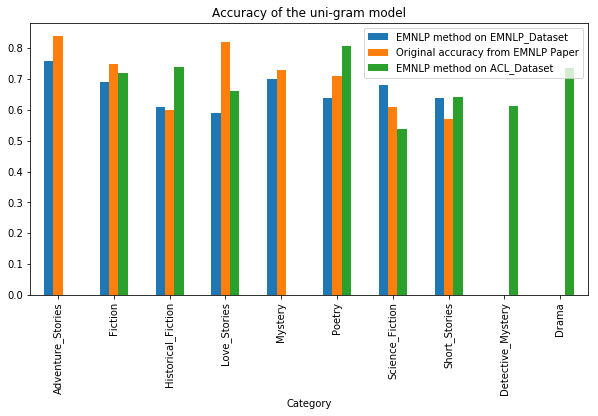

In [61]:
df_uni_com.plot(x="Category", y=["EMNLP method on EMNLP_Dataset",
                                                 "Original accuracy from EMNLP Paper",
                                                 "EMNLP method on ACL_Dataset"
                                                 ], kind="bar", figsize=(10,5),
               title='Accuracy of the uni-gram model', legend=True )

In [64]:
df_bi_com = df_emnlp_bi.merge(df_nacl_bi, on='Category', how='outer')
df_bi_com = df_bi_com.merge(df_paper_bi, on='Category', how='outer')
df_bi_com.rename(columns={'Accuracy_x': 'EMNLP method on EMNLP_Dataset', 'Accuracy_y': 'EMNLP method on ACL_Dataset', 'Accuracy': 'Original accuracy from EMNLP Paper'}, inplace=True)
df_bi_com.head(10)

,Category,EMNLP method on EMNLP_Dataset,EMNLP method on ACL_Dataset,Original accuracy from EMNLP Paper
0,Adventure_Stories,0.75,NaN,0.81
1,Fiction,0.74,0.739921,0.75
2,Historical_Fiction,0.58,0.776471,0.51
3,Love_Stories,0.69,0.737500,0.72
4,Mystery,0.71,NaN,0.73
5,Poetry,0.68,0.872973,0.72
6,Science_Fiction,0.57,0.470588,0.59
7,Short_Stories,0.74,0.717044,0.57
8,Detective_Mystery,NaN,0.632035,NaN
9,Drama,NaN,0.778421,NaN


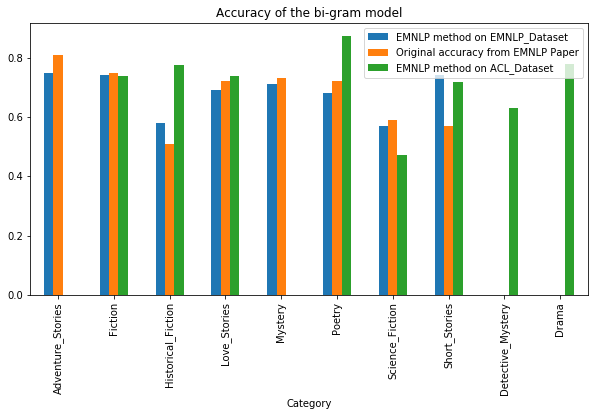

In [66]:
df_bi_com.plot(x="Category", y=["EMNLP method on EMNLP_Dataset",
                                                 "Original accuracy from EMNLP Paper",
                                                 "EMNLP method on ACL_Dataset"
                                                 ], kind="bar", figsize=(10,5),
               title='Accuracy of the bi-gram model', legend=True )